# Simple MNIST NN from scratch

In this notebook, I implemented a simple two-layer neural network and trained it on the MNIST digit recognizer dataset.


In [40]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('C:\\Users\\sujee\\OneDrive\\Desktop\\projects\\mnist\\mnist.csv')

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [43]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [45]:
data.head(100)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [52]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) 

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

In [53]:
Y_train

array([8, 3, 7, ..., 9, 4, 3], dtype=int64)

In [54]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

In [55]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [56]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[3 5 5 ... 3 3 3] [8 3 7 ... 9 4 3]
0.13675609756097562
Iteration:  10
[8 5 2 ... 3 3 3] [8 3 7 ... 9 4 3]
0.17170731707317075
Iteration:  20
[8 5 2 ... 2 3 3] [8 3 7 ... 9 4 3]
0.23070731707317074
Iteration:  30
[8 3 2 ... 2 3 3] [8 3 7 ... 9 4 3]
0.2628536585365854
Iteration:  40
[2 3 2 ... 9 3 3] [8 3 7 ... 9 4 3]
0.29609756097560974
Iteration:  50
[2 3 4 ... 9 6 3] [8 3 7 ... 9 4 3]
0.34195121951219515
Iteration:  60
[2 3 4 ... 9 6 3] [8 3 7 ... 9 4 3]
0.4147560975609756
Iteration:  70
[2 3 4 ... 9 6 3] [8 3 7 ... 9 4 3]
0.47673170731707315
Iteration:  80
[2 3 4 ... 9 8 3] [8 3 7 ... 9 4 3]
0.5050487804878049
Iteration:  90
[2 3 4 ... 9 8 3] [8 3 7 ... 9 4 3]
0.5246341463414634
Iteration:  100
[2 3 4 ... 9 8 3] [8 3 7 ... 9 4 3]
0.5421219512195122
Iteration:  110
[2 3 9 ... 9 8 3] [8 3 7 ... 9 4 3]
0.5569512195121952
Iteration:  120
[2 3 9 ... 9 8 3] [8 3 7 ... 9 4 3]
0.5718536585365853
Iteration:  130
[8 3 9 ... 9 8 3] [8 3 7 ... 9 4 3]
0.586
Iteration:  140
[8 3 9 .

~85% accuracy on training set.

In [57]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [8]
Label:  8


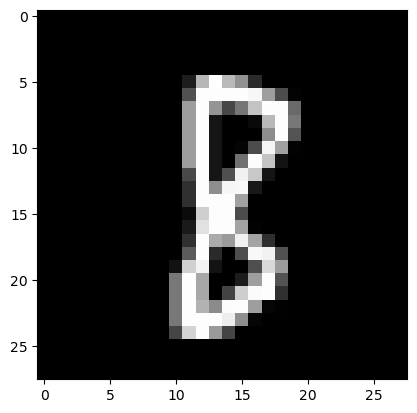

Prediction:  [3]
Label:  3


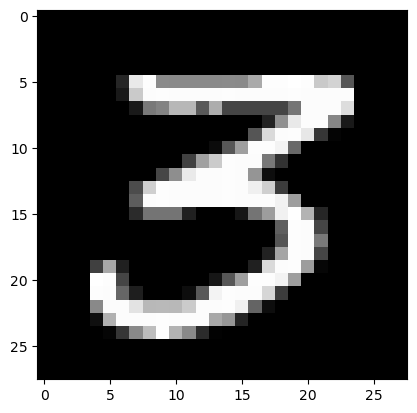

Prediction:  [7]
Label:  7


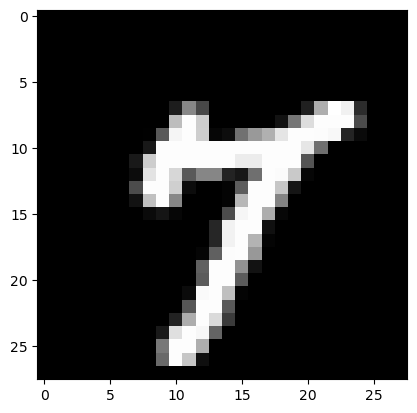

Prediction:  [3]
Label:  3


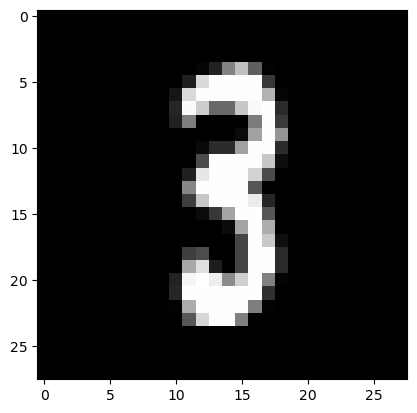

In [61]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)


Prediction:  [0]
Label:  0


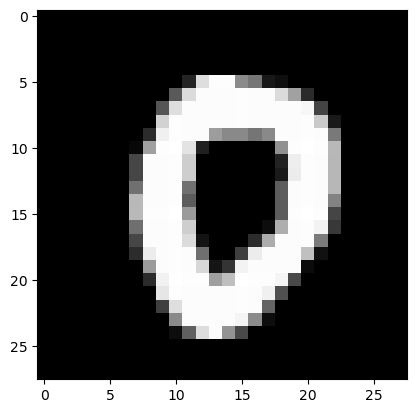

In [62]:
test_prediction(45, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [29]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[3 9 5 3 7 0 9 9 2 6 4 9 1 6 4 7 1 3 6 2 4 0 3 7 2 0 0 3 5 5 5 6 3 3 8 6 3
 8 7 4 9 1 7 1 1 7 2 0 3 9 8 6 9 8 9 2 3 0 6 9 9 0 2 5 3 5 8 1 8 3 8 9 7 2
 2 8 9 3 2 2 8 4 6 6 6 6 1 0 4 6 7 8 9 6 0 6 8 4 7 1 2 0 5 4 9 5 9 9 8 3 1
 0 1 1 6 4 1 2 9 8 7 8 2 4 9 5 8 5 1 0 7 8 9 0 3 5 2 2 6 4 9 2 2 1 2 1 7 4
 2 9 1 2 3 4 4 2 8 2 9 5 3 7 3 7 7 9 9 3 2 7 7 6 8 0 9 6 9 7 6 9 3 4 4 5 2
 2 0 8 6 4 3 1 1 9 7 6 6 0 3 8 2 0 4 5 2 9 2 1 1 9 1 4 2 2 5 8 2 7 7 3 5 3
 8 8 7 6 7 3 5 9 1 1 3 1 8 8 4 1 4 5 0 4 3 2 9 0 9 4 3 9 5 4 4 2 9 8 2 0 3
 6 6 6 7 1 0 7 6 1 9 2 3 6 4 0 2 5 0 3 6 3 3 3 6 8 2 5 5 3 7 2 6 8 3 8 1 4
 0 0 0 0 9 9 3 3 3 3 4 7 8 4 6 3 0 1 1 1 6 2 4 0 7 3 5 3 7 9 9 2 8 1 9 0 5
 1 7 0 5 4 5 6 9 5 1 4 3 8 1 2 4 4 9 3 5 6 5 1 3 9 6 2 2 7 3 5 6 6 8 9 9 5
 6 1 3 2 4 4 8 4 1 2 1 8 9 7 3 3 9 5 2 8 4 9 5 8 4 6 8 7 0 9 8 9 7 2 8 8 4
 2 6 2 6 6 5 1 7 1 7 5 8 2 5 9 6 3 5 1 1 9 6 5 1 4 1 3 1 5 5 0 7 7 5 8 0 0
 9 5 2 7 9 3 7 5 2 9 2 0 2 9 2 8 4 1 6 3 1 8 0 8 2 0 2 3 2 4 2 0 6 3 2 0 0
 2 0 1 1 7 1 3 2 2 7 9 6 

0.849

Still 84% accuracy, so our model generalized from the training data pretty well.